# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

boston = load_boston()
data = boston["data"]

feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [78]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

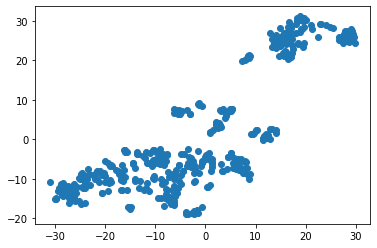

In [79]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

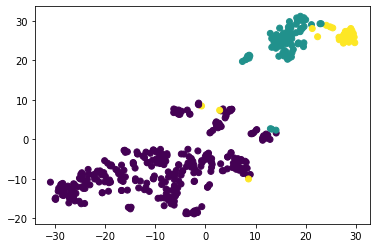

In [80]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [81]:
print(f'Среднее значение цены для 1 кластера: {y_train[labels_train == 0].mean().round(2)[0]}')
print(f'Среднее значение цены для 2 кластера: {y_train[labels_train == 1].mean().round(2)[0]}')
print(f'Среднее значение цены для 3 кластера: {y_train[labels_train == 2].mean().round(2)[0]}')

print(f'Средний уровень криминала для 1 кластера: {X_train[labels_train == 0].mean().round(2)[0]}')
print(f'Средний уровень криминала для 2 кластера: {X_train[labels_train == 1].mean().round(2)[0]}')
print(f'Средний уровень криминала для 3 кластера: {X_train[labels_train == 2].mean().round(2)[0]}')

Среднее значение цены для 1 кластера: 25.17
Среднее значение цены для 2 кластера: 17.44
Среднее значение цены для 3 кластера: 13.2
Средний уровень криминала для 1 кластера: 0.4
Средний уровень криминала для 2 кластера: 11.75
Средний уровень криминала для 3 кластера: 14.36


## *Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [82]:
labels_test = kmeans.predict(X_test)

print(f'Среднее значение цены для 1 кластера: {y_test[labels_test == 0].mean().round(2)[0]}')
print(f'Среднее значение цены для 2 кластера: {y_test[labels_test == 1].mean().round(2)[0]}')
print(f'Среднее значение цены для 3 кластера: {y_test[labels_test == 2].mean().round(2)[0]}')

print(f'Средний уровень криминала для 1 кластера: {X_test[labels_test == 0].mean().round(2)[0]}')
print(f'Средний уровень криминала для 2 кластера: {X_test[labels_test == 1].mean().round(2)[0]}')
print(f'Средний уровень криминала для 3 кластера: {X_test[labels_test == 2].mean().round(2)[0]}')

Среднее значение цены для 1 кластера: 23.91
Среднее значение цены для 2 кластера: 17.39
Среднее значение цены для 3 кластера: 12.81
Средний уровень криминала для 1 кластера: 0.25
Средний уровень криминала для 2 кластера: 8.47
Средний уровень криминала для 3 кластера: 19.02
